# CASE STUDY FAST FOOD DATA 

The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald’s with respect to the following attributes: YUMMY,
CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,
HEALTHY, and DISGUSTING.  For each of those attributes, respondents
provided either a YES response (indicating that they feel McDonald’s possesses
this attribute), or a NO response (indicating that McDonald’s does not possess this
attribute).

#### 4.Exploring Data

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load data
mcdonalds = pd.read_csv('mcdonalds.csv')  



In [2]:
mcdonalds.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
mcdonalds.shape

(1453, 15)

In [5]:
# Extract the segmentation variables and convert YES/NO to 1/0
MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)
mean=round(MD_x.mean(),2)
mean



yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

The average values of the transformed binary numeric segmentation variables
indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY,
91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that
McDonald’s food is SPICY.

In [6]:
# PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

In [7]:
standard_deviation = np.sqrt(pca.explained_variance_)
proportion_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(proportion_variance)
pca_summary = pd.DataFrame({
    'Standard Deviation': standard_deviation,
    'Proportion of Variance': proportion_variance,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(standard_deviation))])

print(pca_summary)


      Standard Deviation  Proportion of Variance  Cumulative Proportion
PC1             0.757050                0.299447               0.299447
PC2             0.607456                0.192797               0.492244
PC3             0.504619                0.133045               0.625290
PC4             0.398799                0.083096               0.708386
PC5             0.337405                0.059481               0.767866
PC6             0.310275                0.050300               0.818166
PC7             0.289697                0.043849               0.862015
PC8             0.275122                0.039548               0.901563
PC9             0.265251                0.036761               0.938323
PC10            0.248842                0.032353               0.970677
PC11            0.236903                0.029323               1.000000


In [8]:
print("Stand Deviat",standard_deviation.round(1))

Stand Deviat [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [9]:

# Display explained variance
print("Explained variance ratio:", np.round(pca.explained_variance_ratio_, 4))
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))


Explained variance ratio: [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
Cumulative explained variance: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519  0.013041  0.572403 -0.1102

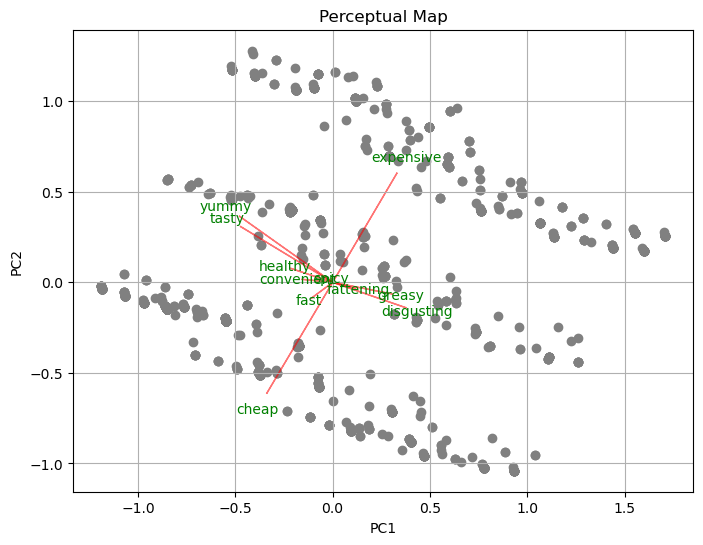

In [10]:
# Display factor loadings (components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(MD_x.shape[1])], index=MD_x.columns)
print(loadings)

# Plot perceptual map
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
for i, varname in enumerate(MD_x.columns):
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1], color='r', alpha=0.5)
    plt.text(loadings.iloc[i, 0] * 1.15, loadings.iloc[i, 1] * 1.15, varname, color='g', ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Perceptual Map')
plt.grid()
plt.show()



 The attributes CHEAP and
EXPENSIVE play a key role in the evaluation of McDonald’s, and these two attributes
are assessed quite independently of the others.The remaining attributes align
with what can be interpreted as positive versus negative perceptions: FATTENING,
DISGUSTING and GREASY point in the same direction in the perceptual chart,
indicating that respondents who view McDonald’s as FATTENING, DISGUSTING are
also likely to view it as GREASY. In the opposite direction are the positive attributes
FAST, CONVENIENT, HEALTHY, as well as TASTY and YUMMY. The observations
along the EXPENSIVE versus CHEAP axis cluster around three values: a group of
consumers at the top around the arrow pointing to CHEAP, a group of respondents.at the bottom around the arrow pointing to EXPENSIVE, and a group of respondents
in the middle.

#### 5.Extracting Segments

In [11]:
import numpy as np
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(1234)

# Define the range of clusters to explore
cluster_range = range(2, 9)
kmeans_results = {}

# Perform k-means clustering for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234, verbose=False)
    kmeans.fit(MD_x)
    
    # Store the results for each cluster number
    kmeans_results[n_clusters] = kmeans



# Print results for review
for n_clusters, kmeans in kmeans_results.items():
    print(f"Number of clusters: {n_clusters}")
    print(f"Inertia: {kmeans.inertia_}")
    print(f"Cluster centers:\n{kmeans.cluster_centers_}\n")


Number of clusters: 2
Inertia: 2145.5037269171585
Cluster centers:
[[0.87053571 0.97767857 0.10267857 0.8359375  0.43303571 0.93861607
  0.67075893 0.97098214 0.30022321 0.28125    0.06473214]
 [0.04129264 0.79533214 0.07899461 0.91741472 0.67684022 0.83842011
  0.48294434 0.11849192 0.45062837 0.06642729 0.52962298]]

Number of clusters: 3
Inertia: 1818.717659165387
Cluster centers:
[[0.81360947 0.95857988 0.12721893 0.90532544 0.62130178 0.86390533
  0.10059172 0.93786982 0.9112426  0.20710059 0.15680473]
 [0.01408451 0.78269618 0.07645875 0.9195171  0.66197183 0.84708249
  0.52716298 0.04627767 0.40442656 0.06237425 0.55331992]
 [0.84304207 0.98058252 0.08899676 0.80420712 0.36569579 0.96278317
  0.92880259 0.96440129 0.01779935 0.30420712 0.04045307]]

Number of clusters: 4
Inertia: 1604.1072915407933
Cluster centers:
[[0.98050682 0.98245614 0.10331384 0.79532164 0.38791423 0.96101365
  0.9785575  0.98050682 0.04873294 0.37621832 0.06432749]
 [0.01912568 0.90710383 0.09016393 0.920

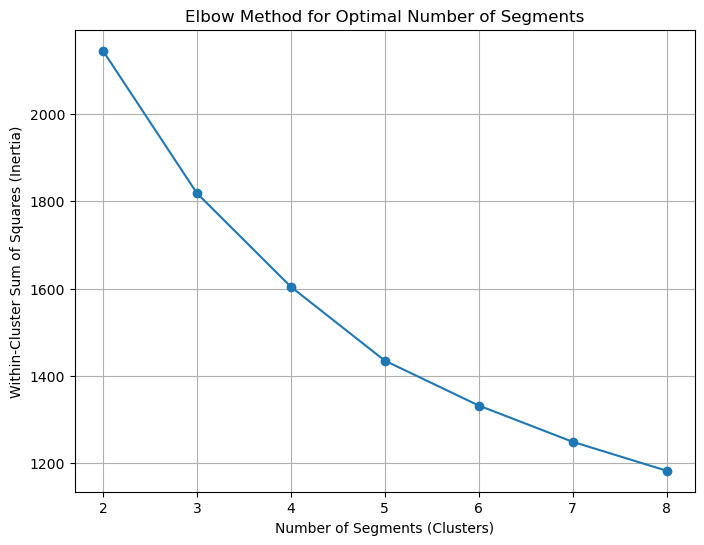

In [12]:
import matplotlib.pyplot as plt

# Extract the inertia (within-cluster sum of squares) for each k
inertia_values = [kmeans_results[k].inertia_ for k in cluster_range]

# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(list(cluster_range), inertia_values, marker='o')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal Number of Segments')
plt.grid(True)
plt.show()


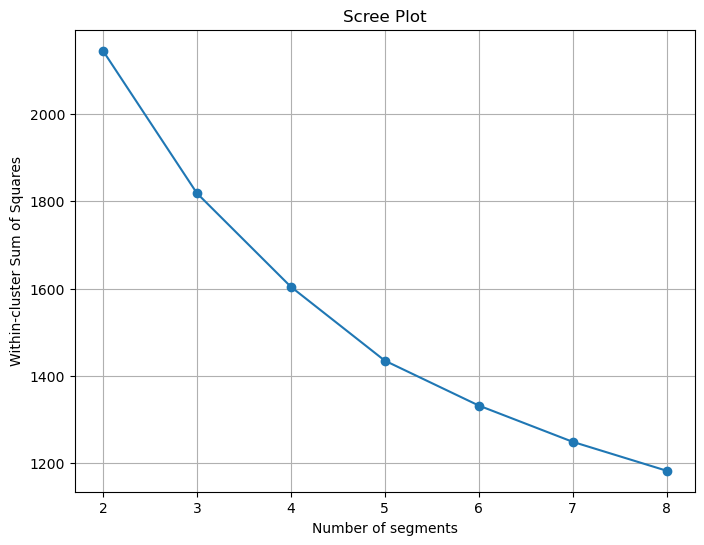

In [13]:
import warnings
warnings.filterwarnings('ignore')
# K-means clustering for 2 to 8 segments
wcss = []
kmeans_models = []
for i in range(2, 9):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    wcss.append(kmeans.inertia_)
    kmeans_models.append(kmeans)

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), wcss, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Within-cluster Sum of Squares')
plt.title('Scree Plot')
plt.grid()
plt.show()



The sum of distances within
market segments drops slowly as the number of market segments increases.

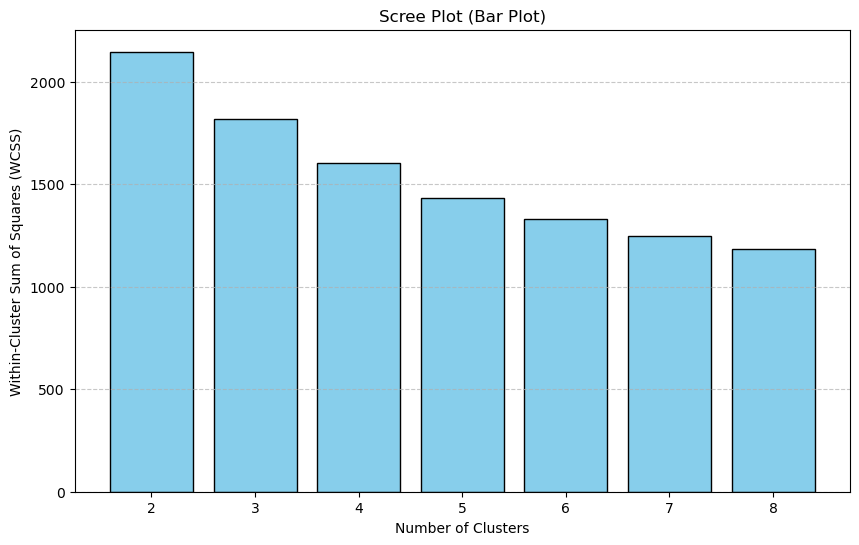

In [14]:
# Calculate WCSS for different numbers of clusters
wcss = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the given number of clusters

# Plot the scree plot as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(2, 9), wcss, color='skyblue', edgecolor='black')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Scree Plot (Bar Plot)')
plt.xticks(range(2, 9))  # Ensure x-ticks correspond to the number of clusters
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

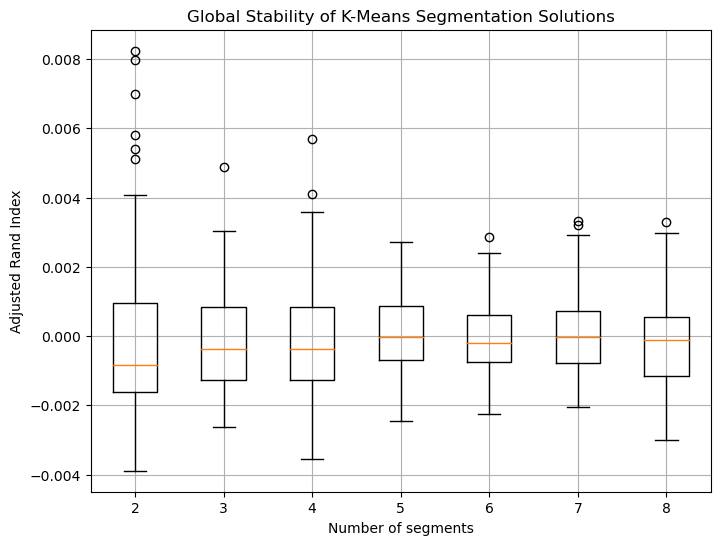

In [15]:
from sklearn.utils import resample
# Stability-based data structure analysis
stability_scores = []
for i in range(2, 9):
    stability = []
    for _ in range(100):
        bootstrap_sample = resample(MD_x, random_state=np.random.randint(0, 10000))
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=1234)
        kmeans.fit(bootstrap_sample)
        stability.append(adjusted_rand_score(kmeans.labels_, kmeans_models[i-2].predict(MD_x)))
    stability_scores.append(stability)

# Stability plot (Boxplot)
plt.figure(figsize=(8, 6))
plt.boxplot(stability_scores, labels=range(2, 9))
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of K-Means Segmentation Solutions')
plt.grid()
plt.show()



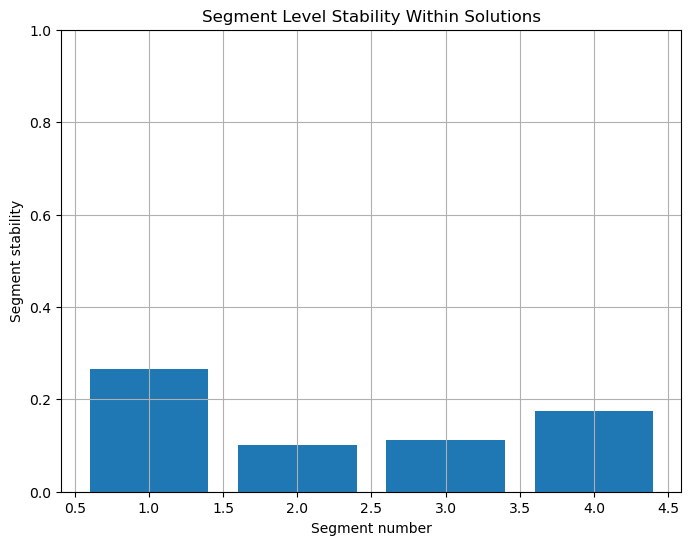

In [16]:
# Select 4-segment solution
best_kmeans = kmeans_models[2]  # This corresponds to 4 segments
labels = best_kmeans.labels_

# Segment level stability within solutions
segment_stability = []
for segment in range(4):
    stability = []
    for _ in range(100):
        bootstrap_sample = resample(MD_x, random_state=np.random.randint(0, 10000))
        kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
        kmeans.fit(bootstrap_sample)
        bootstrap_labels = kmeans.predict(MD_x)
        stability.append(adjusted_rand_score(labels == segment, bootstrap_labels == segment))
    segment_stability.append(np.mean(stability))

# Plot segment stability
plt.figure(figsize=(8, 6))
plt.bar(range(1, 5), segment_stability)
plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.title('Segment Level Stability Within Solutions')
plt.ylim(0, 1)
plt.grid()
plt.show()


#### Using Mixtures of Distributions


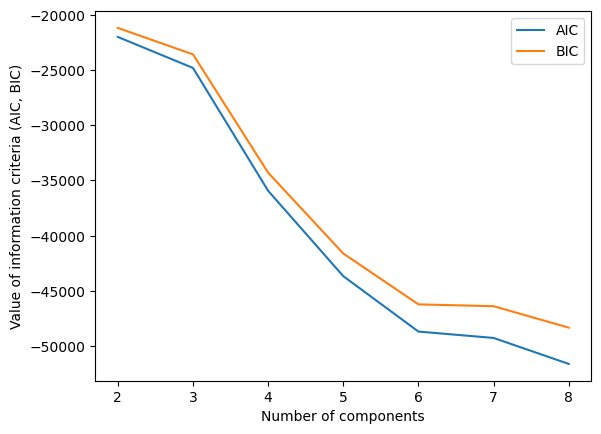

[[  0 349   0  21   0  42 100   1]
 [  0  70   0 163   4  21   5 103]
 [183   0  11   5   5   5   0  33]
 [ 29   0  70  12 193  18   7   3]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
Log-likelihood of the best GMM model: 18.19965392601292


In [17]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming MD.x is the data you want to analyze

# Set random seed for reproducibility
np.random.seed(1234)

# Define function to fit Gaussian Mixture Model
def fit_gmm(data, n_components_range):
    models = []
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
        gmm.fit(data)
        models.append(gmm)
    return models

# Fit GMM with 2 to 8 components
n_components_range = range(2, 9)
gmm_models = fit_gmm(MD_x, n_components_range)

# Get AIC, BIC, and Log-Likelihood for each model
aic = [model.aic(MD_x) for model in gmm_models]
bic = [model.bic(MD_x) for model in gmm_models]
log_likelihood = [model.score(MD_x) for model in gmm_models]

# Plot the AIC, BIC, and ICL (in this case BIC used as a proxy for ICL)
import matplotlib.pyplot as plt

plt.plot(n_components_range, aic, label='AIC')
plt.plot(n_components_range, bic, label='BIC')
plt.xlabel('Number of components')
plt.ylabel('Value of information criteria (AIC, BIC)')
plt.legend()
plt.show()

# Select the best model based on BIC
best_model = gmm_models[np.argmin(bic)]

# Perform K-means clustering with 4 clusters for comparison
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
kmeans_labels = kmeans.labels_

# Compare the GMM clusters with K-means clusters
gmm_labels = best_model.predict(MD_x)

# Cross-tabulation
from sklearn.metrics import confusion_matrix
ct = confusion_matrix(kmeans_labels, gmm_labels)
print(ct)

# Log-likelihood of the best GMM model
print("Log-likelihood of the best GMM model:", best_model.score(MD_x))


#### 6.Profiling Segments

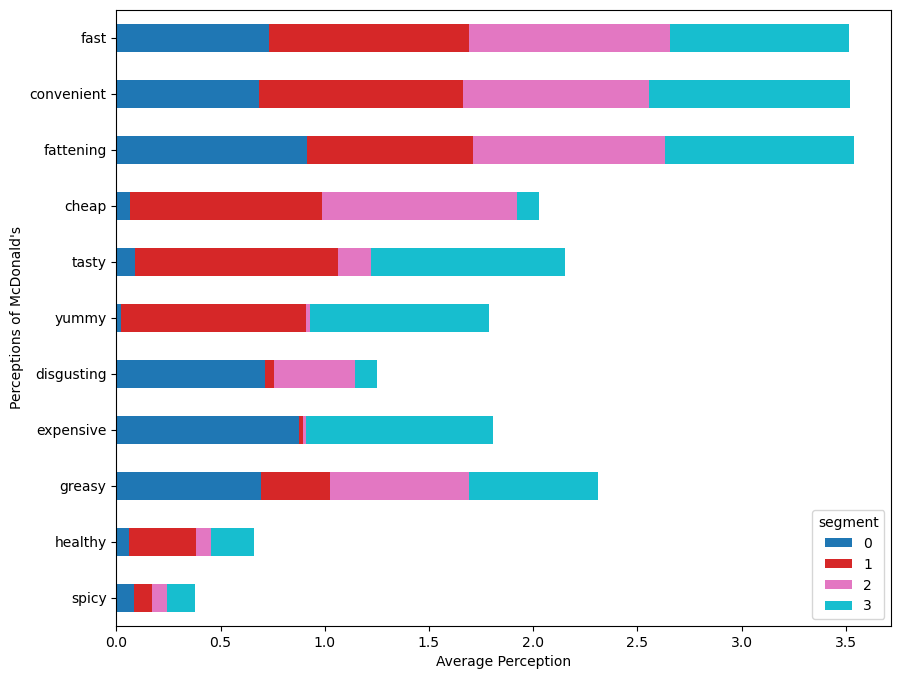

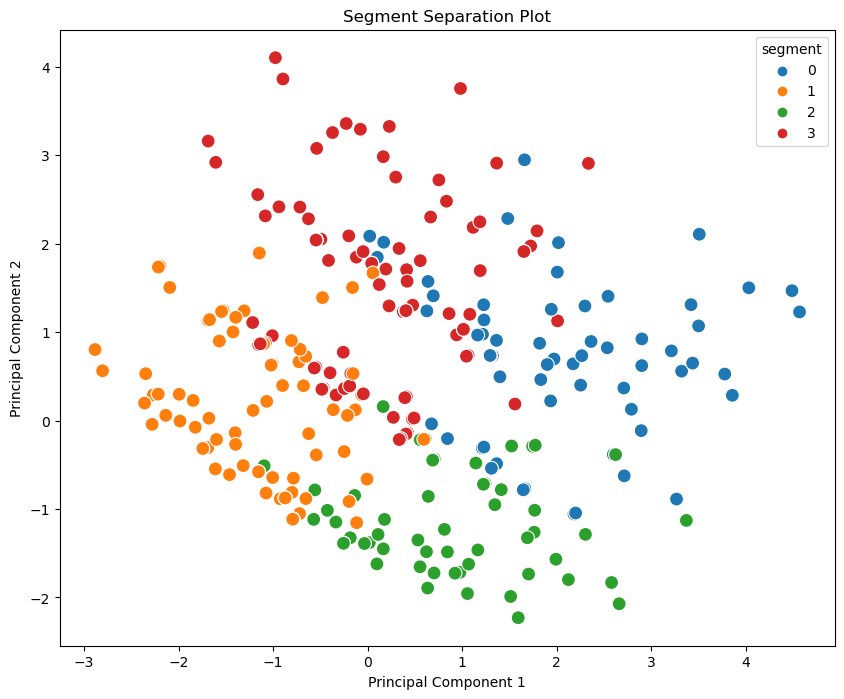

In [18]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Step 1: Perform hierarchical clustering on the segmentation variables to reorder them
MD_vclust = linkage(MD_x.T, method='ward')

# Step 2: Reorder the variables based on the hierarchical clustering
ordered_indices = dendrogram(MD_vclust, no_plot=True)['leaves']
MD_x_ordered = MD_x.iloc[:, ordered_indices]

# Step 3: Perform k-means clustering to get the segment labels
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=123)
MD_k4 = pd.DataFrame({'segment': kmeans.fit_predict(MD_x_ordered)})

# Step 4: Create a segment profile plot (similar to the barchart in R)
segment_means = MD_x_ordered.groupby(MD_k4['segment']).mean()
segment_sizes = MD_k4['segment'].value_counts(normalize=True)

# Plotting the segment profile plot
fig, ax = plt.subplots(figsize=(10, 8))
segment_means.T.plot(kind='barh', ax=ax, stacked=True, colormap='tab10')
ax.set_xlabel('Average Perception')
ax.set_ylabel('Perceptions of McDonald\'s')
plt.show()

# Step 5: Perform PCA for the segment separation plot
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x_ordered)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)

# Step 6: Create the segment separation plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4['segment'], palette='tab10', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot')
plt.show()


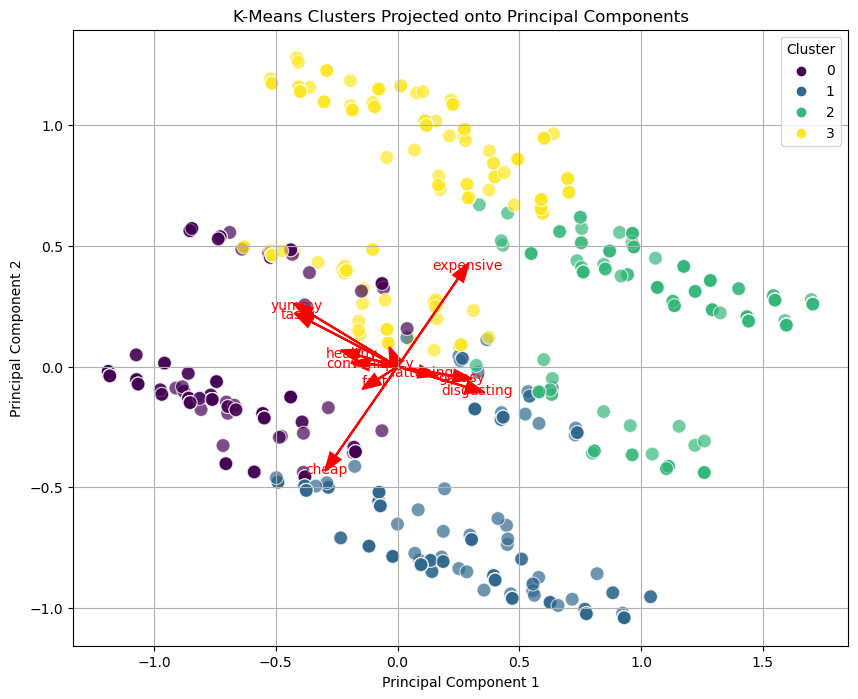

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming MD_x is your data matrix and MD_k4 is your KMeans model with 4 clusters
n_clusters = 4

# Perform PCA on the data
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

# Fit KMeans clustering (assuming it hasn't been done yet)
kmeans_4 = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
MD_k4_labels = kmeans_4.fit_predict(MD_x)

# Plot the clusters projected onto the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4_labels, palette='viridis', s=100, alpha=0.7)

# Annotate the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters Projected onto Principal Components')
plt.legend(title='Cluster')
plt.grid(True)

# Optionally, draw arrows for the original feature axes (like projAxes in R)
components = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, component in enumerate(components):
    plt.arrow(0, 0, component[0], component[1], color='r', head_width=0.05, linewidth=1.5)
    plt.text(component[0] * 1.15, component[1] * 1.15, mcdonalds.columns[i], color='r', ha='center', va='center')

plt.show()


#### 7.Describing Segments

In [20]:
#DESCRIBING SEGMENTS
mcdonalds['cluster_num'] = kmeans.labels_
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(mcdonalds['cluster_num'],mcdonalds['Like'])
crosstab 

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,14,6,8,0,13,19,30,28,39,89,0
1,65,90,143,111,13,6,2,4,43,4,99
2,31,31,12,2,25,28,34,36,51,54,0
3,42,60,66,47,7,6,7,3,36,5,44


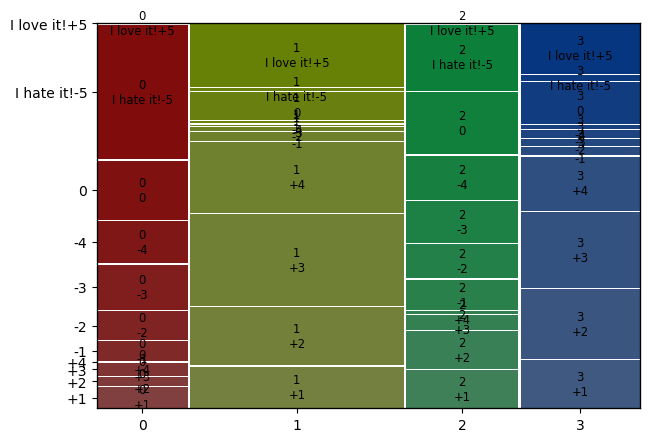

In [21]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [22]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(mcdonalds['cluster_num'],mcdonalds['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,106,140
1,349,231
2,179,125
3,154,169


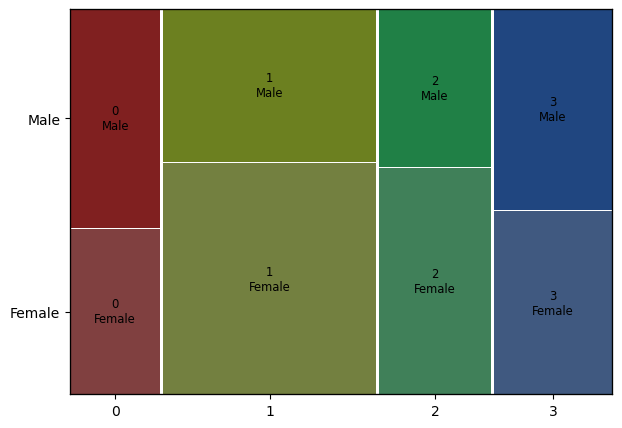

In [23]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

#### 8.Selecting Target Segment

In [25]:
from sklearn.preprocessing import LabelEncoder
mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit = mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.654472
1,1,2.584483
2,2,2.822368
3,3,2.547988


In [26]:
mcdonalds['Like'] = LabelEncoder().fit_transform(mcdonalds['Like'])
Like = mcdonalds.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,6.739837
1,1,3.794828
2,2,5.430921
3,3,3.798762


In [27]:
mcdonalds['Gender'] = LabelEncoder().fit_transform(mcdonalds['Gender'])
Gender = mcdonalds.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.569106
1,1,0.398276
2,2,0.411184
3,3,0.523220


In [28]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.569106,6.739837,2.654472
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.523220,3.798762,2.547988


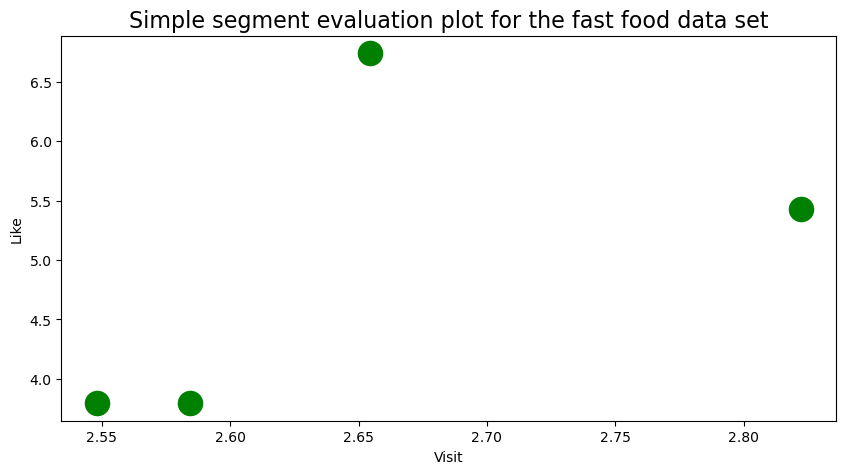

In [29]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="green")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()

#### 9. Customising the Marketing Mix

In Step 9 the marketing mix is designed. If, for example, McDonald’s managers
decide to focus on segment 3 (young customers who like McDonald’s, think the
food is yummy and tasty, but perceive it as pretty expensive), they could choose to
offer a MCSUPERBUDGET line to cater specifically to the price expectations of this
segment (4Ps: Price). The advantage of such an approach might be that members
of segment 3 develop to become loyal customers who, as they start earning more
money, will not care about the price any more and move to the regular McDonald’s
range of products. 

#### **10.Evaluation and Monitoring**
After the market segmentation analysis is completed, and all strategic and tactical
marketing activities have been undertaken, the success of the market segmentation
strategy has to be evaluated, and the market must be carefully monitored on a
continuous basis. It is possible, for example, that members of segment 3 start earning
more money and the MCSUPERBUDGET line is no longer suitable for them. Changes
can occur within existing market segments. But changes can also occur in the
larger marketplace, for example, if new competitors enter the market. All potential
sources of change have to be monitored in order to detect changes which require
McDonald’s management to adjust their strategic or tactical marketing in view of
new market circumstances.